# 수익률 (Returns)

## 가격 데이터에서 수익률 계산하기

<br>

이번 세션에서는 수익률의 기본에 대해 알아봅니다.
가격 데이터를 통해 수익률을 계산하고, 또 일련의 수익률 데이터를 통해 복리 수익률을 계산합니다.

우선 어떤 'A'라는 주식 종목의 가격 시리즈를 파이썬 리스트로 선언해보겠습니다.

In [1]:
prices_a = [8.70, 8.91, 8.71]

$t$ 시점에서 ${t+1}$ 시점까지의 수익률은 각 시점의 가격 데이터를 통해 다음과 같이 계산할 수 있습니다.

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

혹은

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

R 이나 벡터를 지원하는 다른 프로그래밍 언어라면 다음과 같은 구문이 작동할 것입니다.

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

하지만 파이썬의 리스트 자료구조는 벡터로 작동하지 않기 때문에 아래의 구문은 오류를 발생시킵니다.

In [2]:
# WILL NOT WORK - THIS WILL GENERATE AN ERROR!
prices_a[1:]/prices_a[:-1] -1

TypeError: unsupported operand type(s) for /: 'list' and 'list'

대신, 우리는 이 리스트를 `numpy`의 배열로 변환할 수 있습니다. 넘파이의 배열은 벡터처럼 작동하기 때문에 우리는 이를 사용해 손쉽게 수익률 시리즈를 계산할 수 있습니다.

In [3]:
import numpy as np

prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [4]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

이제 가격 데이터를 며칠 더 추가하고 새로운 주식을 추가해보겠습니다. 여기서 이 두 주식은 각각 "BLUE"와 "ORANGE"입니다. 여기서는 넘파이 배열을 사용하는 대신 넘파이의 기능을 매우 편리하고 사용하기 쉬운 구조라 래핑하는 훨씬 더 파워풀한 판다스 데이터프레임을 사용하겠습니다. 아래의 결과를 보면 데이터프레임에는 기본적으로 0부터 4까지의 행 인덱스와 잘 인덱싱된 두 개의 열이 있는 것을 확인할 수 있습니다.

In [5]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [6]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [7]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [8]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [9]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


여러 가지 방법으로 이 문제를 해결할 수 있습니다. 우선 데이터프레임이 행을 자동으로 정렬하지 않도록 `.values`를 사용해 데이터프레임의 값들만을 추출할 수 있습니다. `.values`를 사용하면 넘파이 배열을 반환하게 됩니다.

In [10]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


또는 분모를 동일한 방법으로 처리할 수도 있습니다.

In [11]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


그러나 값을 추출하지 않고 이 작업을 수행하는 몇 가지 방법이 있으며, 사실 이 방법이 더 깔끔하고 읽기 쉽습니다.

첫 번째 옵션은 배열에서 인덱스를 재정렬하는 `.shift()` 메서드를 사용하는 것입니다.

In [12]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


수익률을 계산하기 위해서는 인덱스 0(8.84 및 10.66)의 행을 인덱스 1(8.91 및 11.08)의 행과 정렬하여 두 번째 행(인덱스 1)을 첫 번째 행(인덱스 0)으로 나누어야 하기 때문에, 우리는 분모의 행을 전체적으로 1만큼 이동하고 싶습니다. `.shift(1)`은 이를 자동으로 수행합니다.

In [13]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


따라서 이제 우리는 다음과 같이 일별 수익률을 얻을 수 있습니다.

In [14]:
returns = prices/prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


전날의 종가가 없기 때문에 첫날의 수익을 계산할 수 없다는 점에 유의해야 합니다. 따라서 일반적으로 가격에서 수익률로 변환할 때는 하나의 데이터 포인트를 잃게 됩니다.

마지막으로 데이터프레임에는 한 행에서 다른 행으로의 백분율 변경을 계산하는 `.pct_change()`라는 메서드가 있습니다. 이것은 정확히 수익률(가격의 백분율 변화)이기 때문에 이 방법을 사용해도 동일한 수익률을 계산할 수 있습니다.

In [15]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


## CSV 파일로부터 데이터 불러오기

가격 데이터를 일일이 입력하는 것은 매우 비효율적이고 지겨운 일이기 때문에, 이제는 외부 파일로부터 데이터를 불러오겠습니다. 판다스는 CSV 파일에서 데이터를 읽어오는 편리하고 간단한 방법을 제공합니다. 판다스의 `read_csv()` 메서드를 사용하면 됩니다.

In [16]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [17]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [18]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [19]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

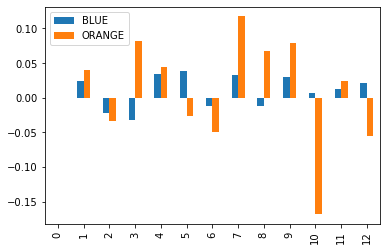

In [20]:
returns.plot.bar()

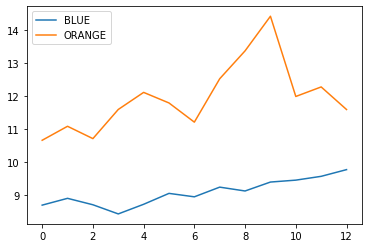

In [21]:
prices.plot()

## 복리 수익률 계산하기

이제 일련의 12개월치 수익률이 있으므로 수익률을 $1+R$ 형식의 성장률(Growth Rate)로 표현한 뒤 전체 구간의 개별 수익률을 곱하여 복리 수익률을 계산할 수 있습니다.

복리 수익률을 계산하기 위해서는 각 수익률에 1을 더한 다음 곱하기만 하면 됩니다. 이 때 최종 결과는 당연히 $1+R$ 형식이기 때문에 마지막에는 1을 빼야 합니다.

두 종목의 복리 수익률을 계산해 보겠습니다.

In [22]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [23]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [24]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [25]:
(returns+1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [26]:
(((returns+1).prod() - 1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## 수익률 연율화 (Annualizing Returns)

일정 기간 동안의 수익률을 연율화시키기 위해서는 1년 기간 수익률을 복리화하면 됩니다. 예를 들어, 월별 수익을 연율화하려면 수익을 12번 복리화합니다. 월별 수익 $R_{m}$을 연간으로 환산하는 공식은 다음과 같습니다.

$$ (1+R_m)^{12} - 1$$

분기 수익률을 연율화하기 위해서는 다음과 같이 계산합니다.

$$ (1+R_q)^{4} - 1$$

마지막으로, 일별 수익률을 연율화하기 위해서는 다음과 같이 계산합니다.

$$ (1+R_d)^{252} - 1$$

예를 들어, 월별 1%, 분기별 4% 및 일일 수익률 0.01%를 연율화하려면 다음과 같이 수행합니다.

In [27]:
# Annualized Monthly Return
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [28]:
# Annualized Quarterly Return
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [29]:
# Annualized Daily Return
rd = 0.0001
(1+rd)**252 - 1

0.025518911987694626